<a href="https://colab.research.google.com/github/phantommarheaven7621/COVID19_Face_Mask_Detection/blob/main/COVID19_Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download prithwirajmitra/covid-face-mask-detection-dataset

 94% 195M/207M [00:01<00:00, 148MB/s]
100% 207M/207M [00:01<00:00, 152MB/s]


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

# Explore the data

In [59]:
# Paths of directories

import os

base_dir = '/content/New Masks Dataset'

train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')

# Mask and None Mask for train_dir
train_mask_dir = os.path.join(train_dir, 'Mask')
train_nonmask_dir = os.path.join(train_dir, 'Non Mask')

# Mask and None Mask for val_dir
val_mask_dir = os.path.join(val_dir, 'Mask')
val_nonmask_dir = os.path.join(val_dir, 'Non Mask')

# Mask and None Mask for test_dir
test_mask_dir = os.path.join(test_dir, 'Mask')
test_nonmask_dir = os.path.join(test_dir, 'Non Mask')

In [60]:
# List of file names

train_mask_fnames = os.listdir(train_mask_dir)
train_nonmask_fnames = os.listdir(train_nonmask_dir)
val_mask_fnames = os.listdir(val_mask_dir)
val_nonmask_fnames = os.listdir(val_nonmask_dir)
test_mask_fnames = os.listdir(test_mask_dir)
test_nonmask_fnames = os.listdir(test_nonmask_dir)

print('Training mask: {} images'.format(len(train_mask_fnames)))
print('Training non mask: {} images\n'.format(len(train_mask_fnames)))
print('Validation mask: {} images'.format(len(val_mask_fnames)))
print('Validation non mask: {} images\n'.format(len(val_mask_fnames)))
print('Testing mask: {} images'.format(len(test_mask_fnames)))
print('Testing non mask: {} images\n'.format(len(test_mask_fnames)))

Training mask: 300 images
Training non mask: 300 images

Validation mask: 153 images
Validation non mask: 153 images

Testing mask: 50 images
Testing non mask: 50 images



In [61]:
train_mask_fnames[:5]

['1155.jpg', '0150.jpg', '1600.jpg', '0417.jpg', '0911.jpg']

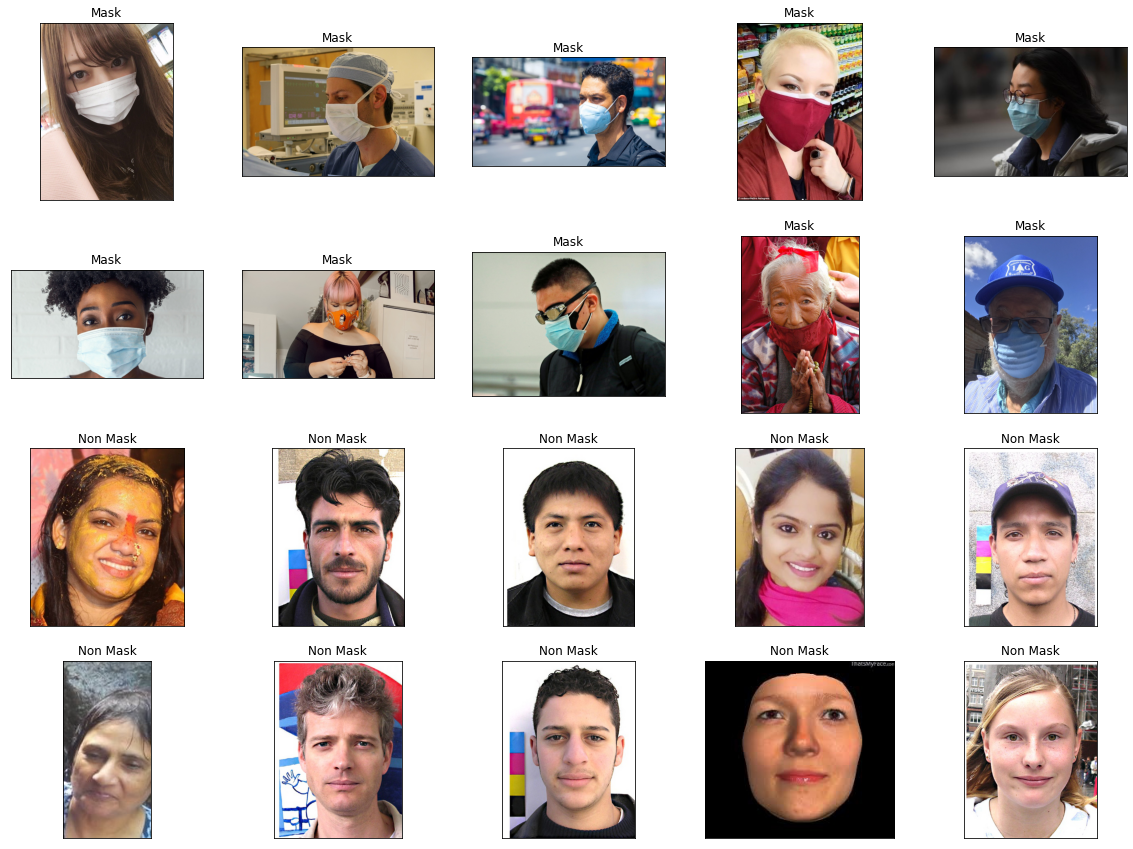

In [62]:
import matplotlib.pyplot as plt
import PIL.Image as Image

# Take 10 images from train mask and 10 images from train non mask
train_show = []
for i in range(10):
  train_show.append(os.path.join(train_mask_dir, train_mask_fnames[i]))

for i in range(10):
  train_show.append(os.path.join(train_nonmask_dir, train_nonmask_fnames[i]))

# Show these 20 images using matplotlib
n_rows = 4
n_cols = 5 

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20,15))

count = 0

for i in range(n_rows):
  for j in range(n_cols):
    img = Image.open(train_show[count])
    ax[i, j].imshow(img)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    if count < 10:
      ax[i, j].set_title('Mask')
    else:
      ax[i, j].set_title('Non Mask')
    count += 1

# Build a ConvNet from scratch

In [63]:
import tensorflow as tf
from tensorflow.keras import Input, Model, regularizers, activations
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization,  Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [64]:
# define a model

inputs = Input(shape=(150, 150, 3))

# first layer
x = Conv2D(16, 3, activation='relu')(inputs)
x = MaxPooling2D(2)(x)

# second layer
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)

# third layer
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)

# dense layer
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

# model
model = Model(inputs=inputs, outputs=outputs)

In [65]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 64)        1849

In [66]:
# compile model
model.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Prepare data

In [67]:
# training and validation data preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    seed=11,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    seed=11,
    class_mode='binary'
)

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [68]:
print(train_generator.class_indices)
print(val_generator.class_indices)

{'Mask': 0, 'Non Mask': 1}
{'Mask': 0, 'Non Mask': 1}


In [69]:
# test data preprocessing
import numpy as np
from sklearn.utils import shuffle

test_data = []
test_labels = []

def convert_to_data(dir, fnames, data, labels, value_of_labels):
  for i, name in enumerate(fnames):
    path = os.path.join(dir, name)
    img = Image.open(path).resize((150, 150))
    img = np.array(img)
    data.append(img)
    labels.append(value_of_labels)
  

convert_to_data(test_mask_dir, test_mask_fnames, test_data, test_labels, 0)
convert_to_data(test_nonmask_dir, test_nonmask_fnames, test_data, test_labels, 1)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

test_data, test_labels = shuffle(test_data, test_labels, random_state=0)

print('Test data: {}'.format(len(test_data)))
print('Test labels: {}\n'.format(len(test_labels)))


Test data: 100
Test labels: 100



# **Training**

In [70]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [71]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=4)

callback_list = [early_stop]

In [72]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=50,
    validation_data=val_generator,
    validation_steps=15,
    verbose=1,
    callbacks=callback_list
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
30/30 [==============================] - 12s 389ms/step - loss: 0.6255 - accuracy: 0.6417 - val_loss: 0.5858 - val_accuracy: 0.7133
Epoch 2/50
30/30 [==============================] - 11s 381ms/step - loss: 0.4170 - accuracy: 0.8483 - val_loss: 0.4239 - val_accuracy: 0.8167
Epoch 3/50
30/30 [==============================] - 11s 376ms/step - loss: 0.3086 - accuracy: 0.8883 - val_loss: 0.3295 - val_accuracy: 0.8600
Epoch 4/50
30/30 [==============================] - 11s 376ms/step - loss: 0.2515 - accuracy: 0.9100 - val_loss: 0.2938 - val_accuracy: 0.8833
Epoch 5/50
30/30 [==============================] - 11s 377ms/step - loss: 0.2428 - accuracy: 0.9067 - val_loss: 0.2775 - val_accuracy: 0.8867
Epoch 6/50
30/30 [==============================] - 11s 377ms/step - loss: 0.2094 - accuracy: 0.9183 - val_loss: 0.3019 - val_accuracy: 0.8667
Epoch 7/50
30/30 [==============================] - 16s 553ms/step - loss: 0.1792 - accuracy: 0.9350 - val_loss: 0.2702 - val_accuracy: 0.8867

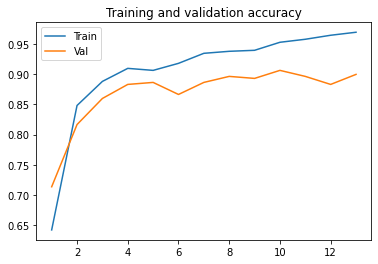

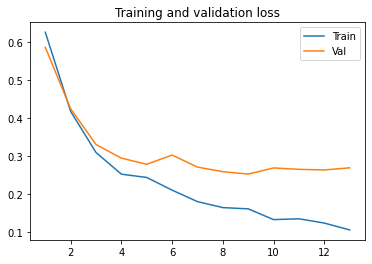

In [73]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(1, len(acc)+1)

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Train')
plt.plot(epochs, val_acc, label='Val')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Train')
plt.plot(epochs, val_loss, label='Val')
plt.title('Training and validation loss')
plt.legend()

In [74]:
model.evaluate(train_generator)

30/30 [==============================] - 6s 194ms/step - loss: 0.0927 - accuracy: 0.9750


[0.09268104285001755, 0.9750000238418579]

In [75]:
model.evaluate(val_generator)

16/16 [==============================] - 5s 331ms/step - loss: 0.2664 - accuracy: 0.8987


[0.26640358567237854, 0.898692786693573]

# Prediction

In [76]:
# Prediction
test_pred = model.predict(test_data) > 0.5
test_pred = [1 if ([[i]] == [[True]]) else 0 for i in test_pred]

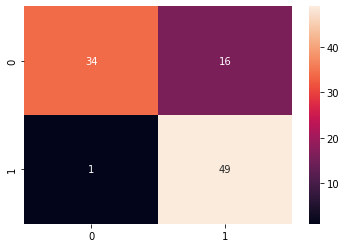

In [77]:
# Import libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(test_labels, test_pred)

sns.heatmap(cm, annot=True, fmt='.3g')

In [78]:
# Accuracy
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 12ms/step - loss: 53.6066 - accuracy: 0.8300


[53.60663604736328, 0.8299999833106995]

In [79]:
#model.save('face_mask.model')

In [80]:
#model1 = tf.keras.models.load_model('face_mask.model')

In [81]:
#! zip -r face_mask.zip face_mask.model

# Adress overfitting

In [93]:
# Using regularizers, Batch Normalization and Dropout

inputs = Input(shape=(150, 150, 3))

# first layer
x = Conv2D(16, 3,
           #kernel_regularizer=regularizers.l2(0.01)
           )(inputs)
#x = BatchNormalization()(x)
x = activations.relu(x)
x = MaxPooling2D(2)(x)

# second layer
x = Conv2D(32, 3,
           #kernel_regularizer=regularizers.l2(0.01)
           )(inputs)
#x = BatchNormalization()(x)
x = activations.relu(x)
x = MaxPooling2D(2)(x)

# third layer
x = Conv2D(64, 3,
           #kernel_regularizer=regularizers.l2(0.01)
           )(inputs)
#x = BatchNormalization()(x)
x = activations.relu(x)
x = MaxPooling2D(2)(x)

# dense layer
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# model
model = Model(inputs=inputs, outputs=outputs)

In [94]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_18 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 tf.nn.relu_8 (TFOpLambda)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 350464)            0         
                                                                 
 dense_10 (Dense)            (None, 128)               44859520  
                                                           

In [95]:
# compile model
model.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [96]:
# Using data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    shear_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    seed=11,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    seed=11,
    class_mode='binary'
)

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [97]:
# Early Stop
early_stop = EarlyStopping(monitor='val_loss', patience=3)

callback_list = [early_stop]


In [98]:
# Training
history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=50,
    validation_data=val_generator,
    validation_steps=15,
    verbose=1,
    callbacks=callback_list
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/50
30/30 [==============================] - 15s 495ms/step - loss: 2.6492 - accuracy: 0.6067 - val_loss: 1.5714 - val_accuracy: 0.7633
Epoch 2/50
30/30 [==============================] - 14s 480ms/step - loss: 1.3228 - accuracy: 0.7933 - val_loss: 1.1790 - val_accuracy: 0.8067
Epoch 3/50
30/30 [==============================] - 14s 479ms/step - loss: 1.0337 - accuracy: 0.8383 - val_loss: 0.9796 - val_accuracy: 0.8033
Epoch 4/50
30/30 [==============================] - 14s 482ms/step - loss: 0.8959 - accuracy: 0.8417 - val_loss: 0.8741 - val_accuracy: 0.8333
Epoch 5/50
30/30 [==============================] - 14s 483ms/step - loss: 0.8346 - accuracy: 0.8433 - val_loss: 0.7967 - val_accuracy: 0.8233
Epoch 6/50
30/30 [==============================] - 15s 513ms/step - loss: 0.7352 - accuracy: 0.8800 - val_loss: 0.7558 - val_accuracy: 0.8133
Epoch 7/50
30/30 [==============================] - 14s 485ms/step - loss: 0.7083 - accuracy: 0.8667 - val_loss: 0.6653 - val_accuracy: 0.8533

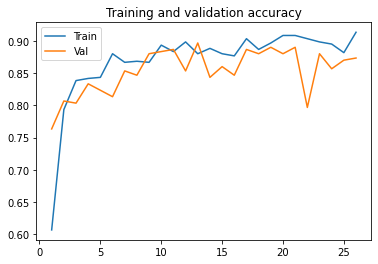

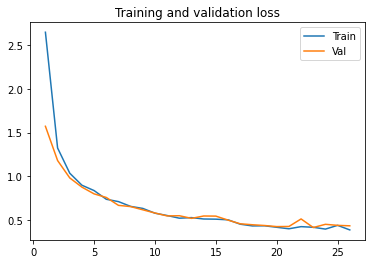

In [99]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(1, len(acc)+1)

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Train')
plt.plot(epochs, val_acc, label='Val')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Train')
plt.plot(epochs, val_loss, label='Val')
plt.title('Training and validation loss')
plt.legend()

In [100]:
model.evaluate(train_generator)

30/30 [==============================] - 9s 291ms/step - loss: 0.3399 - accuracy: 0.9250


[0.339910089969635, 0.925000011920929]

In [101]:
model.evaluate(val_generator)

16/16 [==============================] - 5s 339ms/step - loss: 0.4282 - accuracy: 0.8758


[0.4282253086566925, 0.8758170008659363]

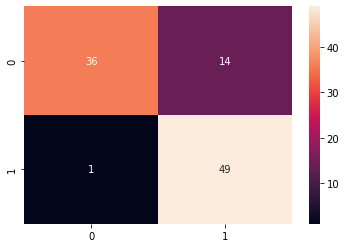

In [102]:
# Prediction
test_pred = model.predict(test_data) > 0.5
test_pred = [1 if ([[i]] == [[True]]) else 0 for i in test_pred]

# Confusion matrix
cm = confusion_matrix(test_labels, test_pred)

sns.heatmap(cm, annot=True, fmt='.3g')

In [103]:
# Accuracy
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 23ms/step - loss: 16.5244 - accuracy: 0.8500


[16.524438858032227, 0.8500000238418579]